# PHASE 1
working on generating 1000000 data points ( working on the dataset which has orders and they got specific products with random dimentions )

In [1]:
import numpy as np

def generate_synthetic_data(n_orders=100000):
    data = []
    for _ in range(n_orders):
        # Generate a random number of items per order (between 1 and 5)
        n_items = np.random.randint(1, 6)
        # Generate a random integer for each dimension of each item
        order = np.random.randint(1, 50, (n_items, 3))
        data.append(order)
    return data

# Generate the synthetic data
synthetic_data = generate_synthetic_data()

In [2]:
import pandas as pd

# Convert the synthetic data to a DataFrame
df = pd.DataFrame.from_records(synthetic_data)

# Save the DataFrame to a CSV file
df.to_csv('synthetic_data.csv', index=False)

In [3]:
import pickle

# Save the synthetic data to a file
with open('synthetic_data.pkl', 'wb') as f:
    pickle.dump(synthetic_data, f)

In [4]:
import json

# Convert numpy arrays to lists
synthetic_data_list = [order.tolist() for order in synthetic_data]

# Save the synthetic data to a JSON file
with open('synthetic.json', 'w') as f:
    json.dump(synthetic_data_list, f)

**Including the cost function that can determine the cost of the box based on the volume of the box**

In [5]:
def calculate_box_cost(dimensions, cost_factor):
    # Calculate the volume of the box
    volume = dimensions[0] * dimensions[1] * dimensions[2]
    # Calculate the cost of the box
    cost = cost_factor * volume
    return cost

# Example usage:
dimensions = [5, 5, 5]  # Dimensions of the box (length, width, height)
cost_factor = 0.1  # Cost factor
cost = calculate_box_cost(dimensions, cost_factor)
print(f"The cost of the box is: {cost}")

The cost of the box is: 12.5


In [6]:
def generate_box_sizes():
    # Define the names of the boxes
    box_names = ["XS", "S", "M", "L", "XL", "XXL", "XXXL"]
    # Generate a unique box size for each size category
    box_sizes = {}
    for i, box_name in enumerate(box_names):
        # Generate a random integer for each dimension of the box
        box_size = [10 * (i+1), 10 * (i+1), 10 * (i+1)]
        # Add the box size to the dictionary
        box_sizes[box_name] = box_size
    return box_sizes

# Generate the box sizes
box_sizes = generate_box_sizes()

In [7]:
# Print the box names and their sizes
for box_name, box_size in box_sizes.items():
    print(f"{box_name}: {box_size}")

XS: [10, 10, 10]
S: [20, 20, 20]
M: [30, 30, 30]
L: [40, 40, 40]
XL: [50, 50, 50]
XXL: [60, 60, 60]
XXXL: [70, 70, 70]


In [8]:
!apt-get install -y -qq glpk-utils

In [9]:
#for a single product

import pulp

def solve_ilp(orders, box_sizes):
    # Create the 'prob' variable to contain the problem data
    prob = pulp.LpProblem("Box Packing Problem", pulp.LpMinimize)

    # Decision variables
    x = pulp.LpVariable.dicts("box", box_sizes.keys(), 0, None, pulp.LpInteger)

    # Objective function
    prob += pulp.lpSum([x[i] for i in box_sizes.keys()]), "Total Cost of Boxes"

    # Constraints
    for order in orders:
        prob += pulp.lpSum([x[i] for i in box_sizes.keys() if box_sizes[i] >= order]) >= 1

    # Solve the problem using GLPK
    prob.solve(pulp.GLPK_CMD())

    # Print the status of the solution
    print("Status:", pulp.LpStatus[prob.status])

    # Print the decision variables
    for v in prob.variables():
        print(v.name, "=", v.varValue)

# Example usage:
orders = [[5, 5, 5], [10, 10, 10], [15, 15, 15]]  # Example orders
solve_ilp(orders, box_sizes)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --cpxlp /tmp/595bc65d4a804c6f838db1ba1c840636-pulp.lp -o /tmp/595bc65d4a804c6f838db1ba1c840636-pulp.sol
Reading problem data from '/tmp/595bc65d4a804c6f838db1ba1c840636-pulp.lp'...
3 rows, 7 columns, 20 non-zeros
7 integer variables, none of which are binary
25 lines were read
GLPK Integer Optimizer, v4.65
3 rows, 7 columns, 20 non-zeros
7 integer variables, none of which are binary
Preprocessing...
3 rows, 7 columns, 20 non-zeros
7 integer variables, none of which are binary
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 3
Solving LP relaxation...
GLPK Simplex Optimizer, v4.65
3 rows, 7 columns, 20 non-zeros
      0: obj =   0.000000000e+00 inf =   3.000e+00 (3)
      1: obj =   1.000000000e+00 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Integer optimization begins...
Long-step d

/opt/conda/lib/python3.10/site-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/kaggle/input/orderdata/order_data.csv')

print(df.columns)
print(df.head)

Index(['items'], dtype='object')
<bound method NDFrame.head of                                                  items
0    [{'length': 20.69609158205068, 'width': 38.331...
1    [{'length': 91.06965740146057, 'width': 86.194...
2    [{'length': 31.473718085303346, 'width': 97.75...
3    [{'length': 93.12174812054292, 'width': 93.532...
4    [{'length': 95.12549981436491, 'width': 58.215...
..                                                 ...
995  [{'length': 72.74920494403364, 'width': 52.868...
996  [{'length': 30.528269336641824, 'width': 8.509...
997  [{'length': 43.496734519871715, 'width': 67.16...
998  [{'length': 11.328582579633911, 'width': 46.32...
999  [{'length': 86.59222017190682, 'width': 18.579...

[1000 rows x 1 columns]>


In [11]:
import pulp
import pandas as pd
import ast

# Load the dataset
df = pd.read_csv('/kaggle/input/orderdata/order_data.csv')

# Extract the product sizes
product_sizes = df['items'].apply(ast.literal_eval).tolist()
product_sizes = [(item[0]['length'], item[0]['width'], item[0]['height']) for item in product_sizes]

# Define the problem
prob = pulp.LpProblem("BoxSelection", pulp.LpMinimize)

# Define the decision variables
box_sizes = {'S': (20, 10, 20), 'M': (40, 20, 40), 'L': (50, 50, 50), 'XL': (70, 40, 70), 'XXL': (70, 80, 70), 'XXXL': (100, 100,100)}
x = pulp.LpVariable.dicts("box", [(i, j) for i in box_sizes.keys() for j in range(len(product_sizes))], 0, None, pulp.LpInteger)

# Define the cost function
costs = {k: sum(v) for k, v in box_sizes.items()}  # The cost is the sum of the dimensions
prob += pulp.lpSum([costs[i]*x[(i, j)] for i in box_sizes.keys() for j in range(len(product_sizes))]), "Total Cost"

# Define the constraints
for j in range(len(product_sizes)):
    for k in box_sizes.keys():
        if all(box_size >= product_size for box_size, product_size in zip(box_sizes[k], product_sizes[j])):
            prob += x[(k, j)] >= 1

# Solve the problem
prob.solve()

# Print the box sizes used for each order
for j in range(len(product_sizes)):
    print(f'Order {j+1}:')
    for box_size in box_sizes.keys():
        if pulp.value(x[(box_size, j)]) > 0:
            print(f'  Box size {box_size} is used {pulp.value(x[(box_size, j)])} times')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/74e29c5b177f4e9da74202b69d351b6a-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/74e29c5b177f4e9da74202b69d351b6a-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1765 COLUMNS
At line 21526 RHS
At line 23287 BOUNDS
At line 29288 ENDATA
Problem MODEL has 1760 rows, 6000 columns and 1760 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 445910 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 445910 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and

**knowing about how many boxes are being used and how many times they are being used**

In [12]:
import pulp
import pandas as pd
import ast
from collections import Counter

# Load the dataset
df = pd.read_csv('/kaggle/input/orderdata/order_data.csv')

# Extract the product sizes
product_sizes = df['items'].apply(ast.literal_eval).tolist()
product_sizes = [(item[0]['length'], item[0]['width'], item[0]['height']) for item in product_sizes]

# Define the problem
prob = pulp.LpProblem("BoxSelection", pulp.LpMinimize)

# Define the decision variables
box_sizes = {'S': (20, 20, 20), 'M': (40, 20, 40), 'L': (50, 50, 50), 'XL': (70, 60, 70), 'XXL': (70, 80, 70), 'XXXL': (100, 100,100)}
x = pulp.LpVariable.dicts("box", [(i, j) for i in box_sizes.keys() for j in range(len(product_sizes))], 0, None, pulp.LpInteger)

# Define the cost function
costs = {k: sum(v) for k, v in box_sizes.items()}  # The cost is the sum of the dimensions
prob += pulp.lpSum([costs[i]*x[(i, j)] for i in box_sizes.keys() for j in range(len(product_sizes))]), "Total Cost"

# Define the constraints
for j in range(len(product_sizes)):
    for k in box_sizes.keys():
        if all(box_size >= product_size for box_size, product_size in zip(box_sizes[k], product_sizes[j])):
            prob += x[(k, j)] >= 1

# Solve the problem
prob.solve()

# Count the usage of each box size
box_usage = Counter()
for j in range(len(product_sizes)):
    for box_size in box_sizes.keys():
        if pulp.value(x[(box_size, j)]) > 0:
            box_usage[box_size] += pulp.value(x[(box_size, j)])

# Print the 7-10 most frequently used box sizes
most_common_boxes = box_usage.most_common(10)
print('The 7-10 most frequently used box sizes are:')
for box_size, count in most_common_boxes:
    print(f'  Box size {box_size} is used {count} times')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/3ff634aeb3d74f3a902938aa813214f1-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/3ff634aeb3d74f3a902938aa813214f1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1870 COLUMNS
At line 21736 RHS
At line 23602 BOUNDS
At line 29603 ENDATA
Problem MODEL has 1865 rows, 6000 columns and 1865 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 470230 - 0.00 seconds
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cbc3007W No integer variables - nothing to do
Cuts at root node changed objective from 470230 to -1.79769e+308
Probing was tried 0 times and created 0 cuts of which 0 were active after adding rounds of cuts (0.000 seconds)
Gomory was tried 0 times and

# **PHASE 2**

**finding out the optimal box for the orders or the products**

In [13]:
pip install ortools

Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
import ast

# Load the dataset
df = pd.read_csv('/kaggle/input/orderdata/order_data.csv')

class Box:
    def __init__(self, size, length, width, height):
        self.size = size
        self.length = length
        self.width = width
        self.height = height
        self.remaining_length = length
        self.remaining_width = width
        self.remaining_height = height

    def can_fit(self, product):
        return (self.remaining_length >= product.length and
                self.remaining_width >= product.width and
                self.remaining_height >= product.height)

    def add_product(self, product):
        self.remaining_length -= product.length
        self.remaining_width -= product.width
        self.remaining_height -= product.height

class Product:
    def __init__(self, length, width, height):
        self.length = length
        self.width = width
        self.height = height

# Define the box sizes
#box_sizes = {'S': Box('S', 50, 40, 50), 'M': Box('M', 80, 80, 80), 'L': Box('L', 100, 50, 70), 
             #'XL': Box('XL', 130, 90, 140), 'XXL': Box('XXL', 150, 150, 150), 'XXXL': Box('XXXL', 180, 180, 180)}

# Extract the product sizes
product_sizes = df['items'].apply(ast.literal_eval).tolist()

# Convert to Product objects, extracting 'length', 'width', and 'height' from each dictionary
product_sizes = [Product(item[0]['length'], item[0]['width'], item[0]['height']) for item in product_sizes if len(item) > 0 and all(key in item[0] for key in ('length', 'width', 'height'))]

# Extract the product sizes and order IDs
product_sizes = [(index, Product(item[0]['length'], item[0]['width'], item[0]['height'])) for index, item in df['items'].apply(ast.literal_eval).items() if len(item) > 0 and all(key in item[0] for key in ('length', 'width', 'height'))]

# Define the box sizes in ascending order
box_sizes = ['S', 'M', 'L', 'XL', 'XXL', 'XXXL']

# Define the box dimensions
box_dimensions = {'S': (20, 20, 20), 'M': (40, 20, 40), 'L': (50, 50, 50), 
                  'XL': (70, 60, 70), 'XXL': (170, 150, 170), 'XXXL': (100, 100, 100)}

# Initialize the dictionary of boxes
boxes = {}

# For each product size
for order_id, product in product_sizes:
    # If the order ID is not in the dictionary, add it
    if order_id not in boxes:
        boxes[order_id] = []
    
    # Try to add the product to an existing box
    for box in boxes[order_id]:
        if box.can_fit(product):
            box.add_product(product)
            break
    else:
        # If the product doesn't fit in any box, create a new box
        for size in box_sizes:
            length, width, height = box_dimensions[size]
            if length >= product.length and width >= product.width and height >= product.height:
                new_box = Box(size, length, width, height)
                new_box.add_product(product)
                boxes[order_id].append(new_box)
                break

# Print the box sizes used for each order
for order_id, boxes_used in boxes.items():
    print('Order ID:', order_id)
    print('Box sizes used:', [box.size for box in boxes_used])

Order ID: 0
Box sizes used: ['L']
Order ID: 1
Box sizes used: ['XXL']
Order ID: 2
Box sizes used: ['XXL']
Order ID: 3
Box sizes used: ['XXL']
Order ID: 4
Box sizes used: ['XXL']
Order ID: 5
Box sizes used: ['XL']
Order ID: 6
Box sizes used: ['XXL']
Order ID: 7
Box sizes used: ['XXL']
Order ID: 8
Box sizes used: ['XXL']
Order ID: 9
Box sizes used: ['XXL']
Order ID: 10
Box sizes used: ['XXL']
Order ID: 11
Box sizes used: ['XXL']
Order ID: 12
Box sizes used: ['XXL']
Order ID: 13
Box sizes used: ['L']
Order ID: 14
Box sizes used: ['XXL']
Order ID: 15
Box sizes used: ['XL']
Order ID: 16
Box sizes used: ['L']
Order ID: 17
Box sizes used: ['XXL']
Order ID: 18
Box sizes used: ['XL']
Order ID: 19
Box sizes used: ['XL']
Order ID: 20
Box sizes used: ['XXL']
Order ID: 21
Box sizes used: ['XXL']
Order ID: 22
Box sizes used: ['XXL']
Order ID: 23
Box sizes used: ['XXL']
Order ID: 24
Box sizes used: ['XL']
Order ID: 25
Box sizes used: ['XXL']
Order ID: 26
Box sizes used: ['XXL']
Order ID: 27
Box sizes

# PHASE-3

**Working on the orientation and product adjustments and also implementing the cost function**

In [20]:
import pandas as pd
import ast

# Load the dataset
df = pd.read_csv('/kaggle/input/orderdata/order_data.csv')

class Box:
    def __init__(self, size, length, width, height, cost_factor):
        self.size = size
        self.length = length
        self.width = width
        self.height = height
        self.remaining_length = length
        self.remaining_width = width
        self.remaining_height = height
        self.cost_factor = cost_factor
        self.items = 0

    def can_fit(self, product):
        # Check all possible orientations
        return ((self.remaining_length >= product.length and
                 self.remaining_width >= product.width and
                 self.remaining_height >= product.height) or
                (self.remaining_length >= product.width and
                 self.remaining_width >= product.height and
                 self.remaining_height >= product.length) or
                (self.remaining_length >= product.height and
                 self.remaining_width >= product.length and
                 self.remaining_height >= product.width))

    def add_product(self, product):
        # Add the product in the orientation that it fits
        if (self.remaining_length >= product.length and
            self.remaining_width >= product.width and
            self.remaining_height >= product.height):
            self.remaining_length -= product.length
            self.remaining_width -= product.width
            self.remaining_height -= product.height
        elif (self.remaining_length >= product.width and
              self.remaining_width >= product.height and
              self.remaining_height >= product.length):
            self.remaining_length -= product.width
            self.remaining_width -= product.height
            self.remaining_height -= product.length
        else:
            self.remaining_length -= product.height
            self.remaining_width -= product.length
            self.remaining_height -= product.width
        self.items += 1

    def calculate_cost(self):
        # Calculate the volume of the box
        volume = self.length * self.width * self.height
        # Calculate the cost of the box
        cost = self.cost_factor * volume
        return cost

class Product:
    def __init__(self, length, width, height):
        self.length = length
        self.width = width
        self.height = height

# Extract the product sizes and order IDs
product_sizes = [(index, Product(item[0]['length'], item[0]['width'], item[0]['height'])) for index, item in df['items'].apply(ast.literal_eval).items() if len(item) > 0 and all(key in item[0] for key in ('length', 'width', 'height'))]

# Define the box sizes in ascending order
box_sizes = ['S', 'M', 'L', 'XL', 'XXL', 'XXXL']

# Define the box dimensions and cost factors
# Define the box dimensions and cost factors
box_dimensions = {'S': (20, 20, 20, 0.01), 'M': (40, 20, 40, 0.12), 'L': (50, 50, 50, 0.15), 
                  'XL': (70, 60, 70, 0.02), 'XXL': (170, 150, 170, 0.25), 'XXXL': (100, 100, 100, 0.03)}

# Initialize the dictionary of boxes
boxes = {}

# For each product size
for order_id, product in product_sizes:
    # If the order ID is not in the dictionary, add it
    if order_id not in boxes:
        boxes[order_id] = []
    
    # Try to add the product to an existing box
    for box in boxes[order_id]:
        if box.can_fit(product):
            box.add_product(product)
            break
    else:
        # If the product doesn't fit in any box, create a new box
        for size in box_sizes:
            length, width, height, cost_factor = box_dimensions[size]
            if length >= product.length and width >= product.width and height >= product.height:
                new_box = Box(size, length, width, height, cost_factor)
                new_box.add_product(product)
                boxes[order_id].append(new_box)
                break

# Print the box sizes used for each order, the number of items in each box, and the cost of each box
for order_id, boxes_used in boxes.items():
    print('Order ID:', order_id)
    for box in boxes_used:
        print('Box size:', box.size)
        print('Number of items:', box.items)
        print('Cost:', box.calculate_cost())

Order ID: 0
Box size: L
Number of items: 1
Cost: 18750.0
Order ID: 1
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 2
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 3
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 4
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 5
Box size: XL
Number of items: 1
Cost: 5880.0
Order ID: 6
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 7
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 8
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 9
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 10
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 11
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 12
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 13
Box size: L
Number of items: 1
Cost: 18750.0
Order ID: 14
Box size: XXL
Number of items: 1
Cost: 1083750.0
Order ID: 15
Box size: XL
Number of items: 1
Cost: 5880.0
Order ID: 16
Box size: L
Number of

# phase 4 

**trying to represent this in 3d format with a box and the items**

Order ID: 0
Box size: L
Number of items: 1
Cost: 18750.0


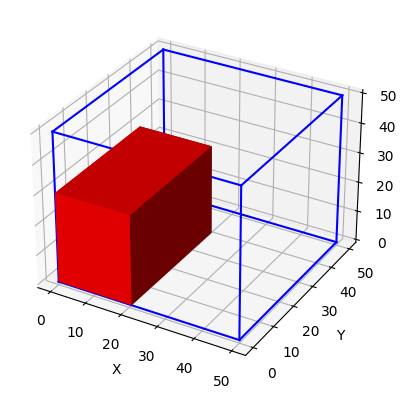

In [24]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from itertools import combinations, product as cartesian_product

# Load the dataset
df = pd.read_csv('/kaggle/input/orderdata/order_data.csv')

class Product:
    def __init__(self, length, width, height):
        self.length = length
        self.width = width
        self.height = height
        self.position = (0, 0, 0)

class Box:
    def __init__(self, size, length, width, height, cost_factor):
        self.size = size
        self.length = length
        self.width = width
        self.height = height
        self.remaining_length = length
        self.remaining_width = width
        self.remaining_height = height
        self.cost_factor = cost_factor
        self.items = []

    def can_fit(self, product):
        return ((self.remaining_length >= product.length and
                 self.remaining_width >= product.width and
                 self.remaining_height >= product.height) or
                (self.remaining_length >= product.width and
                 self.remaining_width >= product.height and
                 self.remaining_height >= product.length) or
                (self.remaining_length >= product.height and
                 self.remaining_width >= product.length and
                 self.remaining_height >= product.width))

    def add_product(self, product):
        product.position = (self.length - self.remaining_length, 
                            self.width - self.remaining_width, 
                            self.height - self.remaining_height)
        self.items.append(product)
        self.remaining_length -= product.length
        self.remaining_width -= product.width
        self.remaining_height -= product.height

    def calculate_cost(self):
        volume = self.length * self.width * self.height
        cost = self.cost_factor * volume
        return cost

product_sizes = [(index, Product(item[0]['length'], item[0]['width'], item[0]['height'])) for index, item in df['items'].apply(ast.literal_eval).items() if len(item) > 0 and all(key in item[0] for key in ('length', 'width', 'height'))]

box_sizes = ['S', 'M', 'L', 'XL', 'XXL', 'XXXL']

box_dimensions = {'S': (20, 20, 20, 0.01), 'M': (40, 20, 40, 0.12), 'L': (50, 50, 50, 0.15), 
                  'XL': (70, 60, 70, 0.02), 'XXL': (170, 150, 170, 0.25), 'XXXL': (100, 100, 100, 0.03)}


boxes = {}

for order_id, product in product_sizes:
    if order_id not in boxes:
        boxes[order_id] = []
    
    for box in boxes[order_id]:
        if box.can_fit(product):
            box.add_product(product)
            break
    else:
        for size in box_sizes:
            length, width, height, cost_factor = box_dimensions[size]
            if length >= product.length and width >= product.width and height >= product.height:
                new_box = Box(size, length, width, height, cost_factor)
                new_box.add_product(product)
                boxes[order_id].append(new_box)
                break

order_id, boxes_used = next(iter(boxes.items()))
print('Order ID:', order_id)
for box in boxes_used:
    print('Box size:', box.size)
    print('Number of items:', len(box.items))
    print('Cost:', box.calculate_cost())

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the box
    x = [0, box.length]
    y = [0, box.width]
    z = [0, box.height]
    for s, e in combinations(np.array(list(cartesian_product(x, y, z))), 2):
        if np.sum(np.abs(s-e)) == box.length or np.sum(np.abs(s-e)) == box.width or np.sum(np.abs(s-e)) == box.height:
            ax.plot3D(*zip(s, e), color="b")

    # Plot the products
    for item in box.items:
        x, y, z = item.position
        dx, dy, dz = item.length, item.width, item.height
        ax.bar3d(x, y, z, dx, dy, dz, color='r')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# future Work
**Better 3d mapiping of objects and work with other methods such as deep learning and re-enforecement learning**